<div class="alert alert-block alert-warning">

# Scaling Exercises

<div class="alert alert-block alert-success">

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

from env import get_connection
from wrangle import wrangle_zillow, acquire_zillow, scale_train_val_test
import os

In [2]:
# Acquire and clean data
df = wrangle_zillow(acquire_zillow())

In [3]:
# check the head
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [4]:
#split data
seed = 42

train, val_test = train_test_split(df, train_size=0.7,
                                   random_state=seed)

val, test = train_test_split(val_test, train_size=0.5,
                             random_state=seed)
train.shape, val.shape, test.shape

((1498164, 7), (321035, 7), (321036, 7))

<div class="alert alert-block alert-info">

1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

<div class="alert alert-block alert-info">

Min Max Scaler

In [5]:
mms = MinMaxScaler()

mms.fit(train[['year_built']])

MinMaxScaler()

In [6]:
train['year_built_mms'] = mms.transform(train[['year_built']])
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186


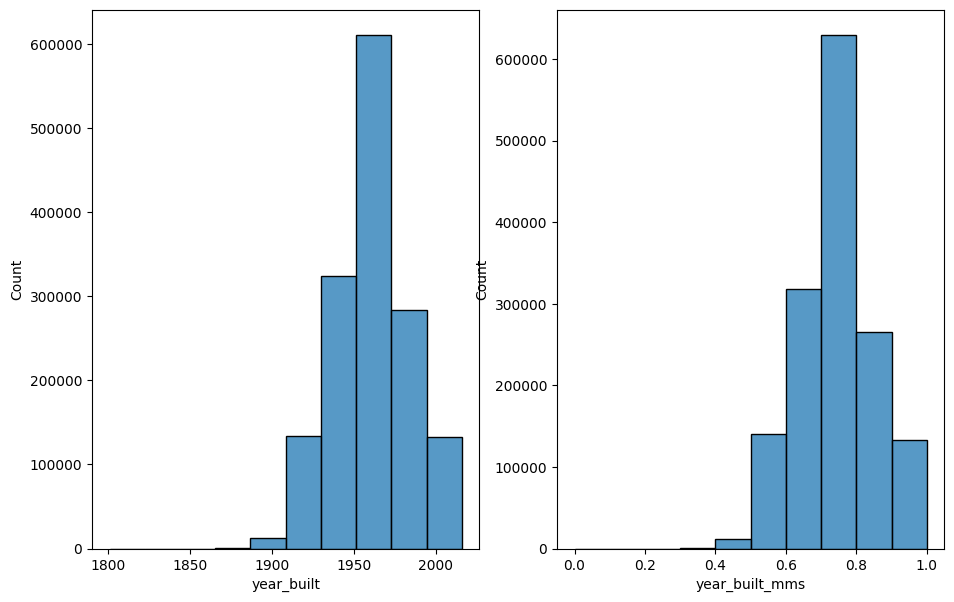

In [7]:
def compare_data(scaled_col, df = train, original='year_built'):
    plt.figure(figsize=(11,7))
    
    plt.subplot(121)
    sns.histplot(data=df, x=original, bins=10)

    plt.subplot(122)  # 1 row and 2 columns
    sns.histplot(data=train, x= scaled_col, bins=10)

    plt.show()
    
compare_data('year_built_mms')

<div class="alert alert-block alert-info">

Standard Scales

In [8]:
ss = StandardScaler()

ss.fit(train[['year_built']])

StandardScaler()

In [9]:
train['year_built_ss'] = ss.transform(train[['year_built']])
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558,0.860076
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070,-0.630058
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791,0.182743
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186,0.002120


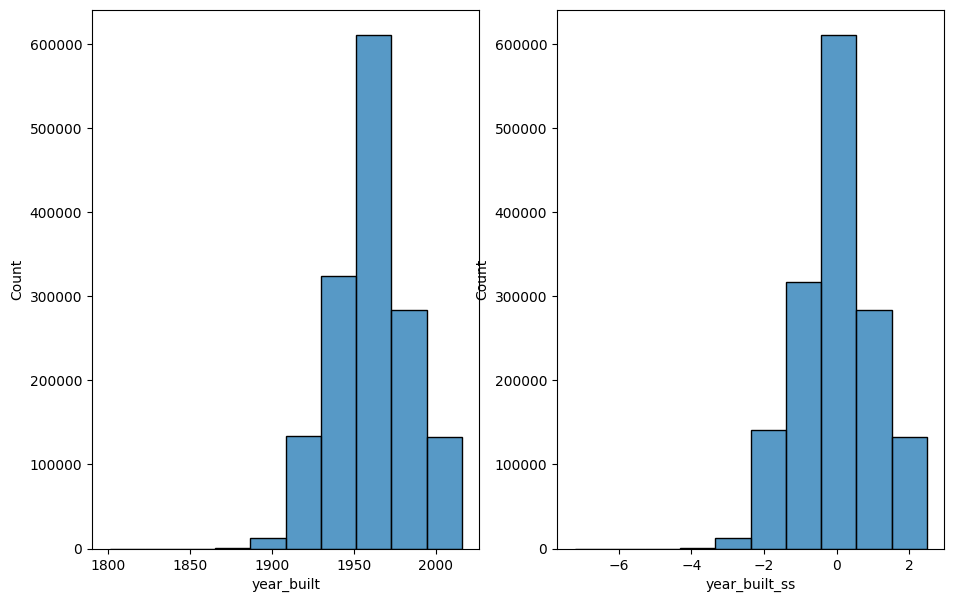

In [10]:
compare_data('year_built_ss')

<div class="alert alert-block alert-info">

Robust Scaler

In [11]:
rs = RobustScaler()

rs.fit(train[['year_built']])

RobustScaler()

In [12]:
train['year_built_rs'] = rs.transform(train[['year_built']])
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss,year_built_rs
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558,0.860076,0.846154
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125,-0.192308
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070,-0.630058,-0.423077
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791,0.182743,0.269231
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186,0.002120,0.115385


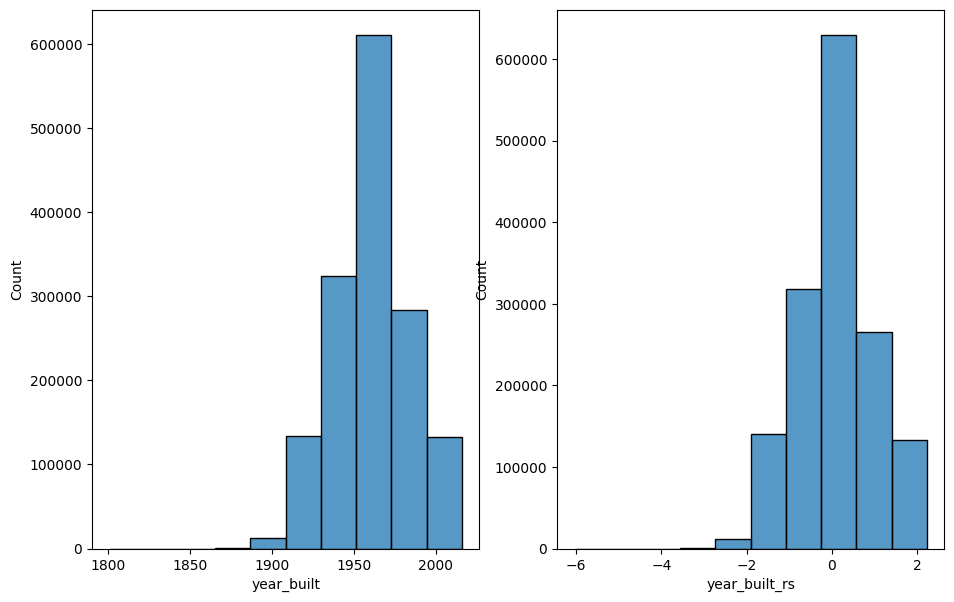

In [13]:
compare_data('year_built_rs')

<div class="alert alert-block alert-info">

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

In [14]:
# mms is the MinMaxScaler. We create a new column and run the inverse transform. 
train['year_built_mms_inverse'] = mms.inverse_transform(train[['year_built_mms']])
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss,year_built_rs,year_built_mms_inverse
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558,0.860076,0.846154,1980.0
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125,-0.192308,1953.0
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070,-0.630058,-0.423077,1947.0
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791,0.182743,0.269231,1965.0
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186,0.002120,0.115385,1961.0


In [15]:
train['remainder'] = train['year_built_mms_inverse'] - train['year_built']


In [16]:
train[train['year_built'] != train['year_built_mms_inverse']].head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss,year_built_rs,year_built_mms_inverse,remainder
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125,-0.192308,1953.0,-2.273737e-13
1853654,3,2.0,1795,266193,1979,3312.28,6037,0.827907,0.814921,0.807692,1979.0,2.273737e-13
2012061,3,3.0,1680,625863,1963,7993.90,6059,0.753488,0.092431,0.192308,1963.0,-2.273737e-13
407600,3,2.0,1158,162438,1954,2049.94,6059,0.711628,-0.313969,-0.153846,1954.0,2.273737e-13
481310,4,3.0,2238,303237,1969,4045.70,6037,0.781395,0.363365,0.423077,1969.0,2.273737e-13


<div class="alert alert-block alert-info">

inverse_transform seems to get back the orinal number when rounded but its not 100% acurate. there is a small difference. Found additional information online and aparently the caused is limited precision of floating-point numbers (number representations in computers)

<div class="alert alert-block alert-info">

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling. 

In [17]:
qt = QuantileTransformer(output_distribution='normal')

qt.fit(train[['year_built']])

QuantileTransformer(output_distribution='normal')

In [18]:
train['year_built_qt'] = qt.transform(train[['year_built']])

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss,year_built_rs,year_built_mms_inverse,remainder,year_built_qt
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558,0.860076,0.846154,1980.0,0.000000e+00,0.849874
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125,-0.192308,1953.0,-2.273737e-13,-0.400635
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070,-0.630058,-0.423077,1947.0,0.000000e+00,-0.855287
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791,0.182743,0.269231,1965.0,0.000000e+00,0.308427
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186,0.002120,0.115385,1961.0,0.000000e+00,0.099274


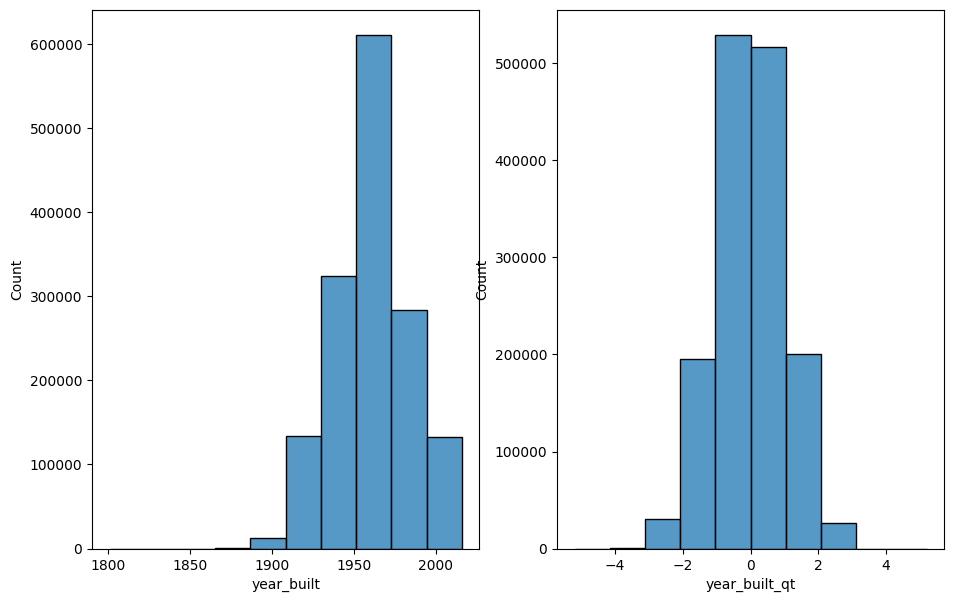

In [19]:
compare_data('year_built_qt')

<div class="alert alert-block alert-info">

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice? 

In [20]:
qt_uniform = QuantileTransformer()

qt_uniform.fit(train[['year_built']])

QuantileTransformer()

In [21]:
train['year_built_qt_uniform'] = qt_uniform.transform(train[['year_built']])

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss,year_built_rs,year_built_mms_inverse,remainder,year_built_qt,year_built_qt_uniform
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558,0.860076,0.846154,1980.0,0.000000e+00,0.849874,0.803804
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125,-0.192308,1953.0,-2.273737e-13,-0.400635,0.350851
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070,-0.630058,-0.423077,1947.0,0.000000e+00,-0.855287,0.199700
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791,0.182743,0.269231,1965.0,0.000000e+00,0.308427,0.626126
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186,0.002120,0.115385,1961.0,0.000000e+00,0.099274,0.549049


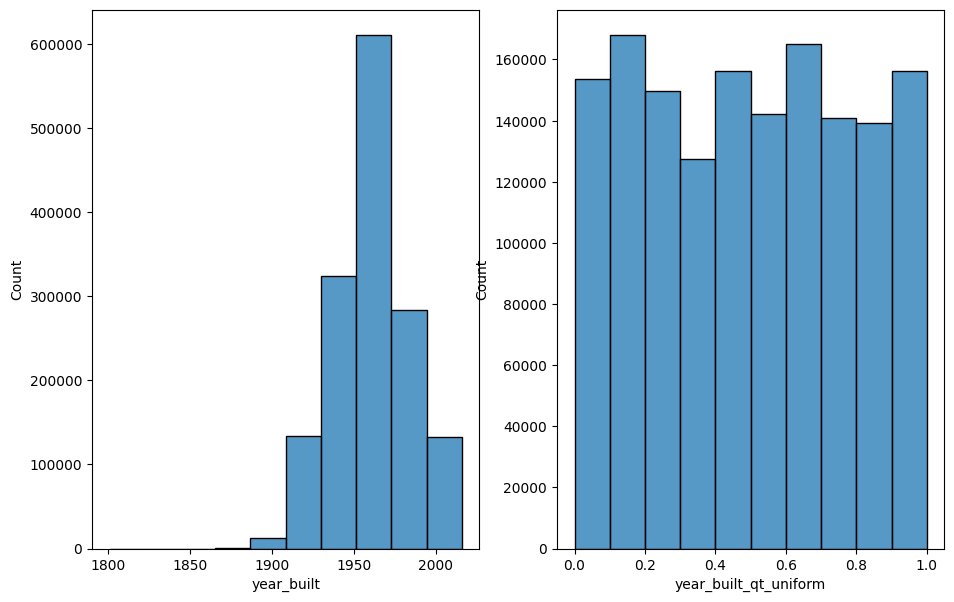

In [22]:
compare_data('year_built_qt_uniform')

<div class="alert alert-block alert-info">

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data! 

In [23]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,year_built_mms,year_built_ss,year_built_rs,year_built_mms_inverse,remainder,year_built_qt,year_built_qt_uniform
1007466,3,2.0,1452,241012,1980,2974.81,6037,0.832558,0.860076,0.846154,1980.0,0.000000e+00,0.849874,0.803804
615622,3,2.0,1262,235630,1953,3029.22,6037,0.706977,-0.359125,-0.192308,1953.0,-2.273737e-13,-0.400635,0.350851
662507,3,1.0,1447,435123,1947,5226.67,6037,0.679070,-0.630058,-0.423077,1947.0,0.000000e+00,-0.855287,0.199700
840040,3,2.0,1403,268770,1965,2849.62,6111,0.762791,0.182743,0.269231,1965.0,0.000000e+00,0.308427,0.626126
243798,3,2.0,1456,365000,1961,4582.48,6037,0.744186,0.002120,0.115385,1961.0,0.000000e+00,0.099274,0.549049


In [24]:
# drop the exercise columns 
train = train.drop('year_built_mms', axis=1)
train = train.drop('year_built_ss', axis=1)
train = train.drop('year_built_rs', axis=1)
train = train.drop('year_built_mms_inverse', axis=1)
train = train.drop('remainder', axis=1)
train = train.drop('year_built_qt', axis=1)
train = train.drop('year_built_qt_uniform', axis=1)

train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1007466,3,2.0,1452,241012,1980,2974.81,6037
615622,3,2.0,1262,235630,1953,3029.22,6037
662507,3,1.0,1447,435123,1947,5226.67,6037
840040,3,2.0,1403,268770,1965,2849.62,6111
243798,3,2.0,1456,365000,1961,4582.48,6037


In [25]:
train_scaled, validate_scaled, test_scaled  = scale_train_val_test(train, val, test)

In [27]:
train_scaled.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
1007466,3,2.0,1452,241012,0.832558,2974.81,6037
615622,3,2.0,1262,235630,0.706977,3029.22,6037
662507,3,1.0,1447,435123,0.679070,5226.67,6037
840040,3,2.0,1403,268770,0.762791,2849.62,6111
243798,3,2.0,1456,365000,0.744186,4582.48,6037


In [ ]:
# Funtion in wrangle.py

def scale_train_val_test(train, val, test):

    mms = MinMaxScaler()

    mms.fit(train[['year_built']])

    train['year_built'] = mms.transform(train[['year_built']])
    val['year_built'] = mms.transform(val[['year_built']])
    test['year_built'] = mms.transform(test[['year_built']])
    
    return train, val, test